## Histogramming with the Chicago Salary Database

ipython has "magic" commands, %pwd, %cd, which are intended to make life easier for humans, like showing our directory and letting us change directory.

In [2]:
# Let us first handle the preliminary imports
import pandas as pd
import matplotlib.pyplot as plt

![City of Chicago](city-of-chicago.jpg "Chicago logo")

In [3]:
salary=pd.read_csv("../data/Current_Employee_Names__Salaries__and_Position_Titles_20210819_Chicago.csv")

In [4]:
salary.head()

Name                              Job Titles   Department  \
0    AARON,  JEFFERY M                                SERGEANT       POLICE   
1       AARON,  KARINA  POLICE OFFICER (ASSIGNED AS DETECTIVE)       POLICE   
2  AARON,  KIMBERLEI R                CHIEF CONTRACT EXPEDITER         DAIS   
3  ABAD JR,  VICENTE M                       CIVIL ENGINEER IV  WATER MGMNT   
4    ABARCA,  EMMANUEL                        CONCRETE LABORER   TRANSPORTN   

  Full or Part-Time Salary or Hourly  Typical Hours  Annual Salary  \
0                 F           Salary            NaN       118998.0   
1                 F           Salary            NaN        97440.0   
2                 F           Salary            NaN       121272.0   
3                 F           Salary            NaN       119712.0   
4                 F           Hourly           40.0            NaN   

   Hourly Rate  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4         45.9

In [5]:
len(salary)

31059

In [6]:
salary.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

In [7]:
salary["Salary or Hourly"]

0        Salary
1        Salary
2        Salary
3        Salary
4        Hourly
          ...  
31054    Salary
31055    Salary
31056    Salary
31057    Salary
31058    Salary
Name: Salary or Hourly, Length: 31059, dtype: object

In [8]:
salary["Salary or Hourly"].value_counts()

Salary or Hourly
Salary    24432
Hourly     6627
Name: count, dtype: int64

In [9]:
salary[salary["Salary or Hourly"] == "Salary"]

Name                              Job Titles  \
0        AARON,  JEFFERY M                                SERGEANT   
1           AARON,  KARINA  POLICE OFFICER (ASSIGNED AS DETECTIVE)   
2      AARON,  KIMBERLEI R                CHIEF CONTRACT EXPEDITER   
3      ABAD JR,  VICENTE M                       CIVIL ENGINEER IV   
5       ABARCA,  FRANCES J                          POLICE OFFICER   
...                    ...                                     ...   
31054   ZYLINSKA,  KLAUDIA                          POLICE OFFICER   
31055   ZYMANTAS,  LAURA C                          POLICE OFFICER   
31056    ZYMANTAS,  MARK E                          POLICE OFFICER   
31057  ZYRKOWSKI,  CARLO E                          POLICE OFFICER   
31058  ZYSKOWSKI,  DARIUSZ                 CHIEF DATA BASE ANALYST   

        Department Full or Part-Time Salary or Hourly  Typical Hours  \
0           POLICE                 F           Salary            NaN   
1           POLICE                 F           Salary            NaN   
2             DAIS                 F           Salary            NaN   
3      WATER MGMNT                 F           Salary            NaN   
5           POLICE                 F           Salary            NaN   
...            ...               ...              ...            ...   
31054       POLICE                 F           Salary            NaN   
31055       POLICE                 F           Salary            NaN   
31056       POLICE                 F           Salary            NaN   
31057       POLICE                 F           Salary            NaN   
31058         DAIS                 F           Salary            NaN   

       Annual Salary  Hourly Rate  
0           118998.0          NaN  
1            97440.0          NaN  
2           121272.0          NaN  
3           119712.0          NaN  
5            72510.0          NaN  
...              ...          ...  
31054        76266.0          NaN  
31055        80016.0          NaN  
31056        90024.0          NaN  
31057        93354.0          NaN  
31058       139392.0          NaN  

[24432 rows x 8 columns]

In [10]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [11]:
print(len(salaried))
print(len(hourly))

24432
6627


In [12]:
len(salary)

31059

<Axes: >

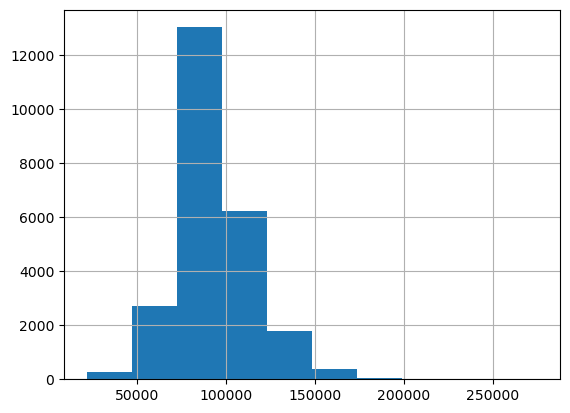

In [13]:
salary["Annual Salary"].hist()

In [ ]:
plt.hist(salaried["Annual Salary"])

(array([2.000e+00, 1.200e+02, 1.640e+02, 6.520e+02, 1.086e+03, 9.590e+02,
        4.026e+03, 3.731e+03, 5.257e+03, 3.186e+03, 1.345e+03, 1.676e+03,
        1.004e+03, 4.850e+02, 3.040e+02, 1.880e+02, 8.200e+01, 9.700e+01,
        2.500e+01, 2.300e+01, 1.600e+01, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 21600. ,  30046.8,  38493.6,  46940.4,  55387.2,  63834. ,
         72280.8,  80727.6,  89174.4,  97621.2, 106068. , 114514.8,
        122961.6, 131408.4, 139855.2, 148302. , 156748.8, 165195.6,
        173642.4, 182089.2, 190536. , 198982.8, 207429.6, 215876.4,
        224323.2, 232770. , 241216.8, 249663.6, 258110.4, 266557.2,
        275004. ]),
 <BarContainer object of 30 artists>)

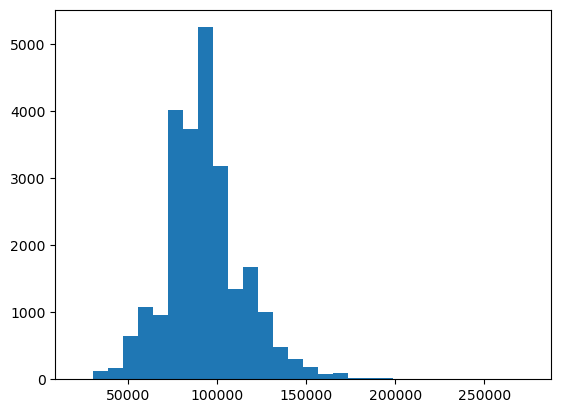

In [14]:
plt.hist(salary["Annual Salary"], bins=30)

In [ ]:
plt.hist(salary["Annual Salary"], bins=30)
plt.xlabel("Annual salary, $")

Text(0.5, 0, 'Annual salary, $')

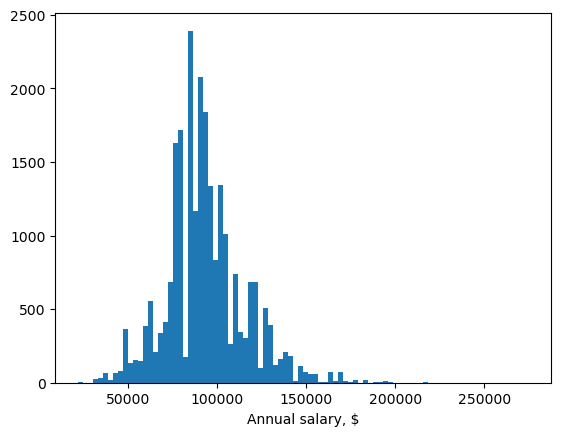

In [15]:
plt.hist(salary["Annual Salary"], bins=90)
plt.xlabel("Annual salary, $")

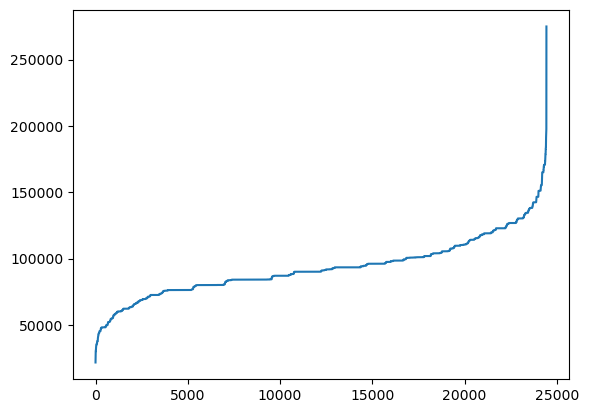

In [16]:
import numpy as np
plt.plot(np.arange(len(salary)), salary.sort_values("Annual Salary")["Annual Salary"]) 

In [17]:
a = pd.to_numeric(salary["Hourly Rate"])
a.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    45.9
Name: Hourly Rate, dtype: float64

In [18]:
import altair as alt
alt.Chart(salary[0:5000]).mark_bar().encode(
    alt.X("Annual Salary:Q", bin=True), 
    y="count()")

alt.Chart(...)

In [ ]:
salary[0:1000]

In [19]:
salaried = salary[salary["Salary or Hourly"] == "Salary"]
hourly = salary[salary["Salary or Hourly"] == "Hourly"]

In [20]:
alt.Chart(salaried[0:10]).mark_bar().encode(
    alt.X("Annual Salary:Q", bin=True), 
    alt.Y("count()"))

alt.Chart(...)

In [23]:
# And if I want more resolution (in altair histograms), 
# I replace bin=True with  bin=alt.Bin(maxbins=N)
alt.Chart(salaried[0:5000]).mark_bar().encode(
    alt.X("Annual Salary:Q", bin=alt.Bin(maxbins=90)), 
    alt.Y("count()"))

alt.Chart(...)

In [21]:
salaried["Annual Salary"]

0        118998.0
1         97440.0
2        121272.0
3        119712.0
5         72510.0
           ...   
31054     76266.0
31055     80016.0
31056     90024.0
31057     93354.0
31058    139392.0
Name: Annual Salary, Length: 24432, dtype: float64

In [22]:
salary["Department"].value_counts()

Department
POLICE                 12822
FIRE                    4785
STREETS & SAN           1874
WATER MGMNT             1830
AVIATION                1468
TRANSPORTN              1203
DAIS                     975
PUBLIC LIBRARY           965
OEMC                     955
FAMILY & SUPPORT         606
HEALTH                   517
FINANCE                  474
CITY COUNCIL             407
LAW                      351
PUBLIC SAFETY ADMIN      271
BUILDINGS                239
BUSINESS AFFAIRS         171
HOUSING & ECON DEV       150
COPA                     120
MAYOR'S OFFICE           106
BOARD OF ELECTION        102
INSPECTOR GEN             93
CITY CLERK                85
PROCUREMENT               78
HOUSING                   70
HUMAN RESOURCES           68
CULTURAL AFFAIRS          61
ANIMAL CONTRL             61
BUDGET & MGMT             39
ADMIN HEARNG              34
TREASURER                 28
DISABILITIES              26
HUMAN RELATIONS           15
BOARD OF ETHICS            7
POL

In [24]:
alt.Chart(salary[0:1000]).mark_bar().encode(
    alt.X("Annual Salary:Q", bin=True), 
    y="count()", 
    color="Department")

alt.Chart(...)

In [25]:
topdepts = salary["Department"].value_counts()[0:9]

In [26]:
topdepts

Department
POLICE            12822
FIRE               4785
STREETS & SAN      1874
WATER MGMNT        1830
AVIATION           1468
TRANSPORTN         1203
DAIS                975
PUBLIC LIBRARY      965
OEMC                955
Name: count, dtype: int64

In [27]:
alt.Chart(salary[0:1000]).mark_bar().encode(
    alt.X("Annual Salary:Q", bin=alt.Bin(maxbins=30)), 
    y="count()", color="Department")

alt.Chart(...)

In [28]:
topdepts.index

Index(['POLICE', 'FIRE', 'STREETS & SAN', 'WATER MGMNT', 'AVIATION',
       'TRANSPORTN', 'DAIS', 'PUBLIC LIBRARY', 'OEMC'],
      dtype='object', name='Department')

In [29]:
deptwhitelist = set (topdepts.index)

In [30]:
"PUBLIC LIBRARY" in deptwhitelist

True

In [31]:
"HOGWARTS" in deptwhitelist

False

In [32]:
"BOARD OF ETHICS" in deptwhitelist

False

In [33]:
salary["Department_clean"] = salary["Department"]

In [34]:
for i in salary.index:
    if i < 10:
        print(salary.Department_clean[i])
    if salary.Department_clean[i] not in deptwhitelist:
        salary.Department_clean[i] = "OTHER"

POLICE
POLICE
DAIS
WATER MGMNT
TRANSPORTN
POLICE
OEMC
AVIATION
FIRE
POLICE


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_86315/109442172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.Department_clean[i] = "OTHER"
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_86315/109442172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.Department_clean[i] = "OTHER"
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_86315/109442172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_86315/109442172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.Department_clean[i] = "OTHER"
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_86315/109442172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.Department_clean[i] = "OTHER"
/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_86315/109442172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [35]:
salary.Department.value_counts()

Department
POLICE                 12822
FIRE                    4785
STREETS & SAN           1874
WATER MGMNT             1830
AVIATION                1468
TRANSPORTN              1203
DAIS                     975
PUBLIC LIBRARY           965
OEMC                     955
FAMILY & SUPPORT         606
HEALTH                   517
FINANCE                  474
CITY COUNCIL             407
LAW                      351
PUBLIC SAFETY ADMIN      271
BUILDINGS                239
BUSINESS AFFAIRS         171
HOUSING & ECON DEV       150
COPA                     120
MAYOR'S OFFICE           106
BOARD OF ELECTION        102
INSPECTOR GEN             93
CITY CLERK                85
PROCUREMENT               78
HOUSING                   70
HUMAN RESOURCES           68
CULTURAL AFFAIRS          61
ANIMAL CONTRL             61
BUDGET & MGMT             39
ADMIN HEARNG              34
TREASURER                 28
DISABILITIES              26
HUMAN RELATIONS           15
BOARD OF ETHICS            7
POL

In [36]:
salary.Department_clean.value_counts()

Department_clean
POLICE            12822
FIRE               4785
OTHER              4182
STREETS & SAN      1874
WATER MGMNT        1830
AVIATION           1468
TRANSPORTN         1203
DAIS                975
PUBLIC LIBRARY      965
OEMC                955
Name: count, dtype: int64

In [37]:
alt.Chart(salary[0:5000]).mark_bar().encode(
    alt.X("Annual Salary:Q", bin=alt.Bin(maxbins=30)), 
    y="count()", color="Department_clean")

alt.Chart(...)